# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Display the first few rows
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [3]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Summary statistics
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    0.600660    0.663366   
std      0.994971   22.8750

# Impute Missing Values

In [5]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify missing values have been handled
print(data_imputed.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Normalize the Data

In [6]:
# Separate features and target
X = data_imputed.drop('target', axis=1)
y = data_imputed['target']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)

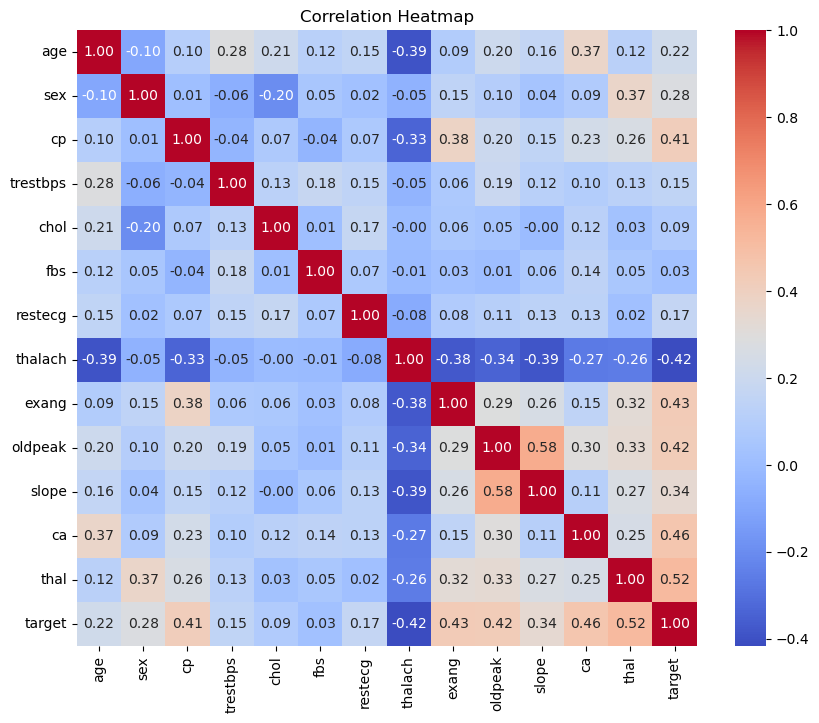

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


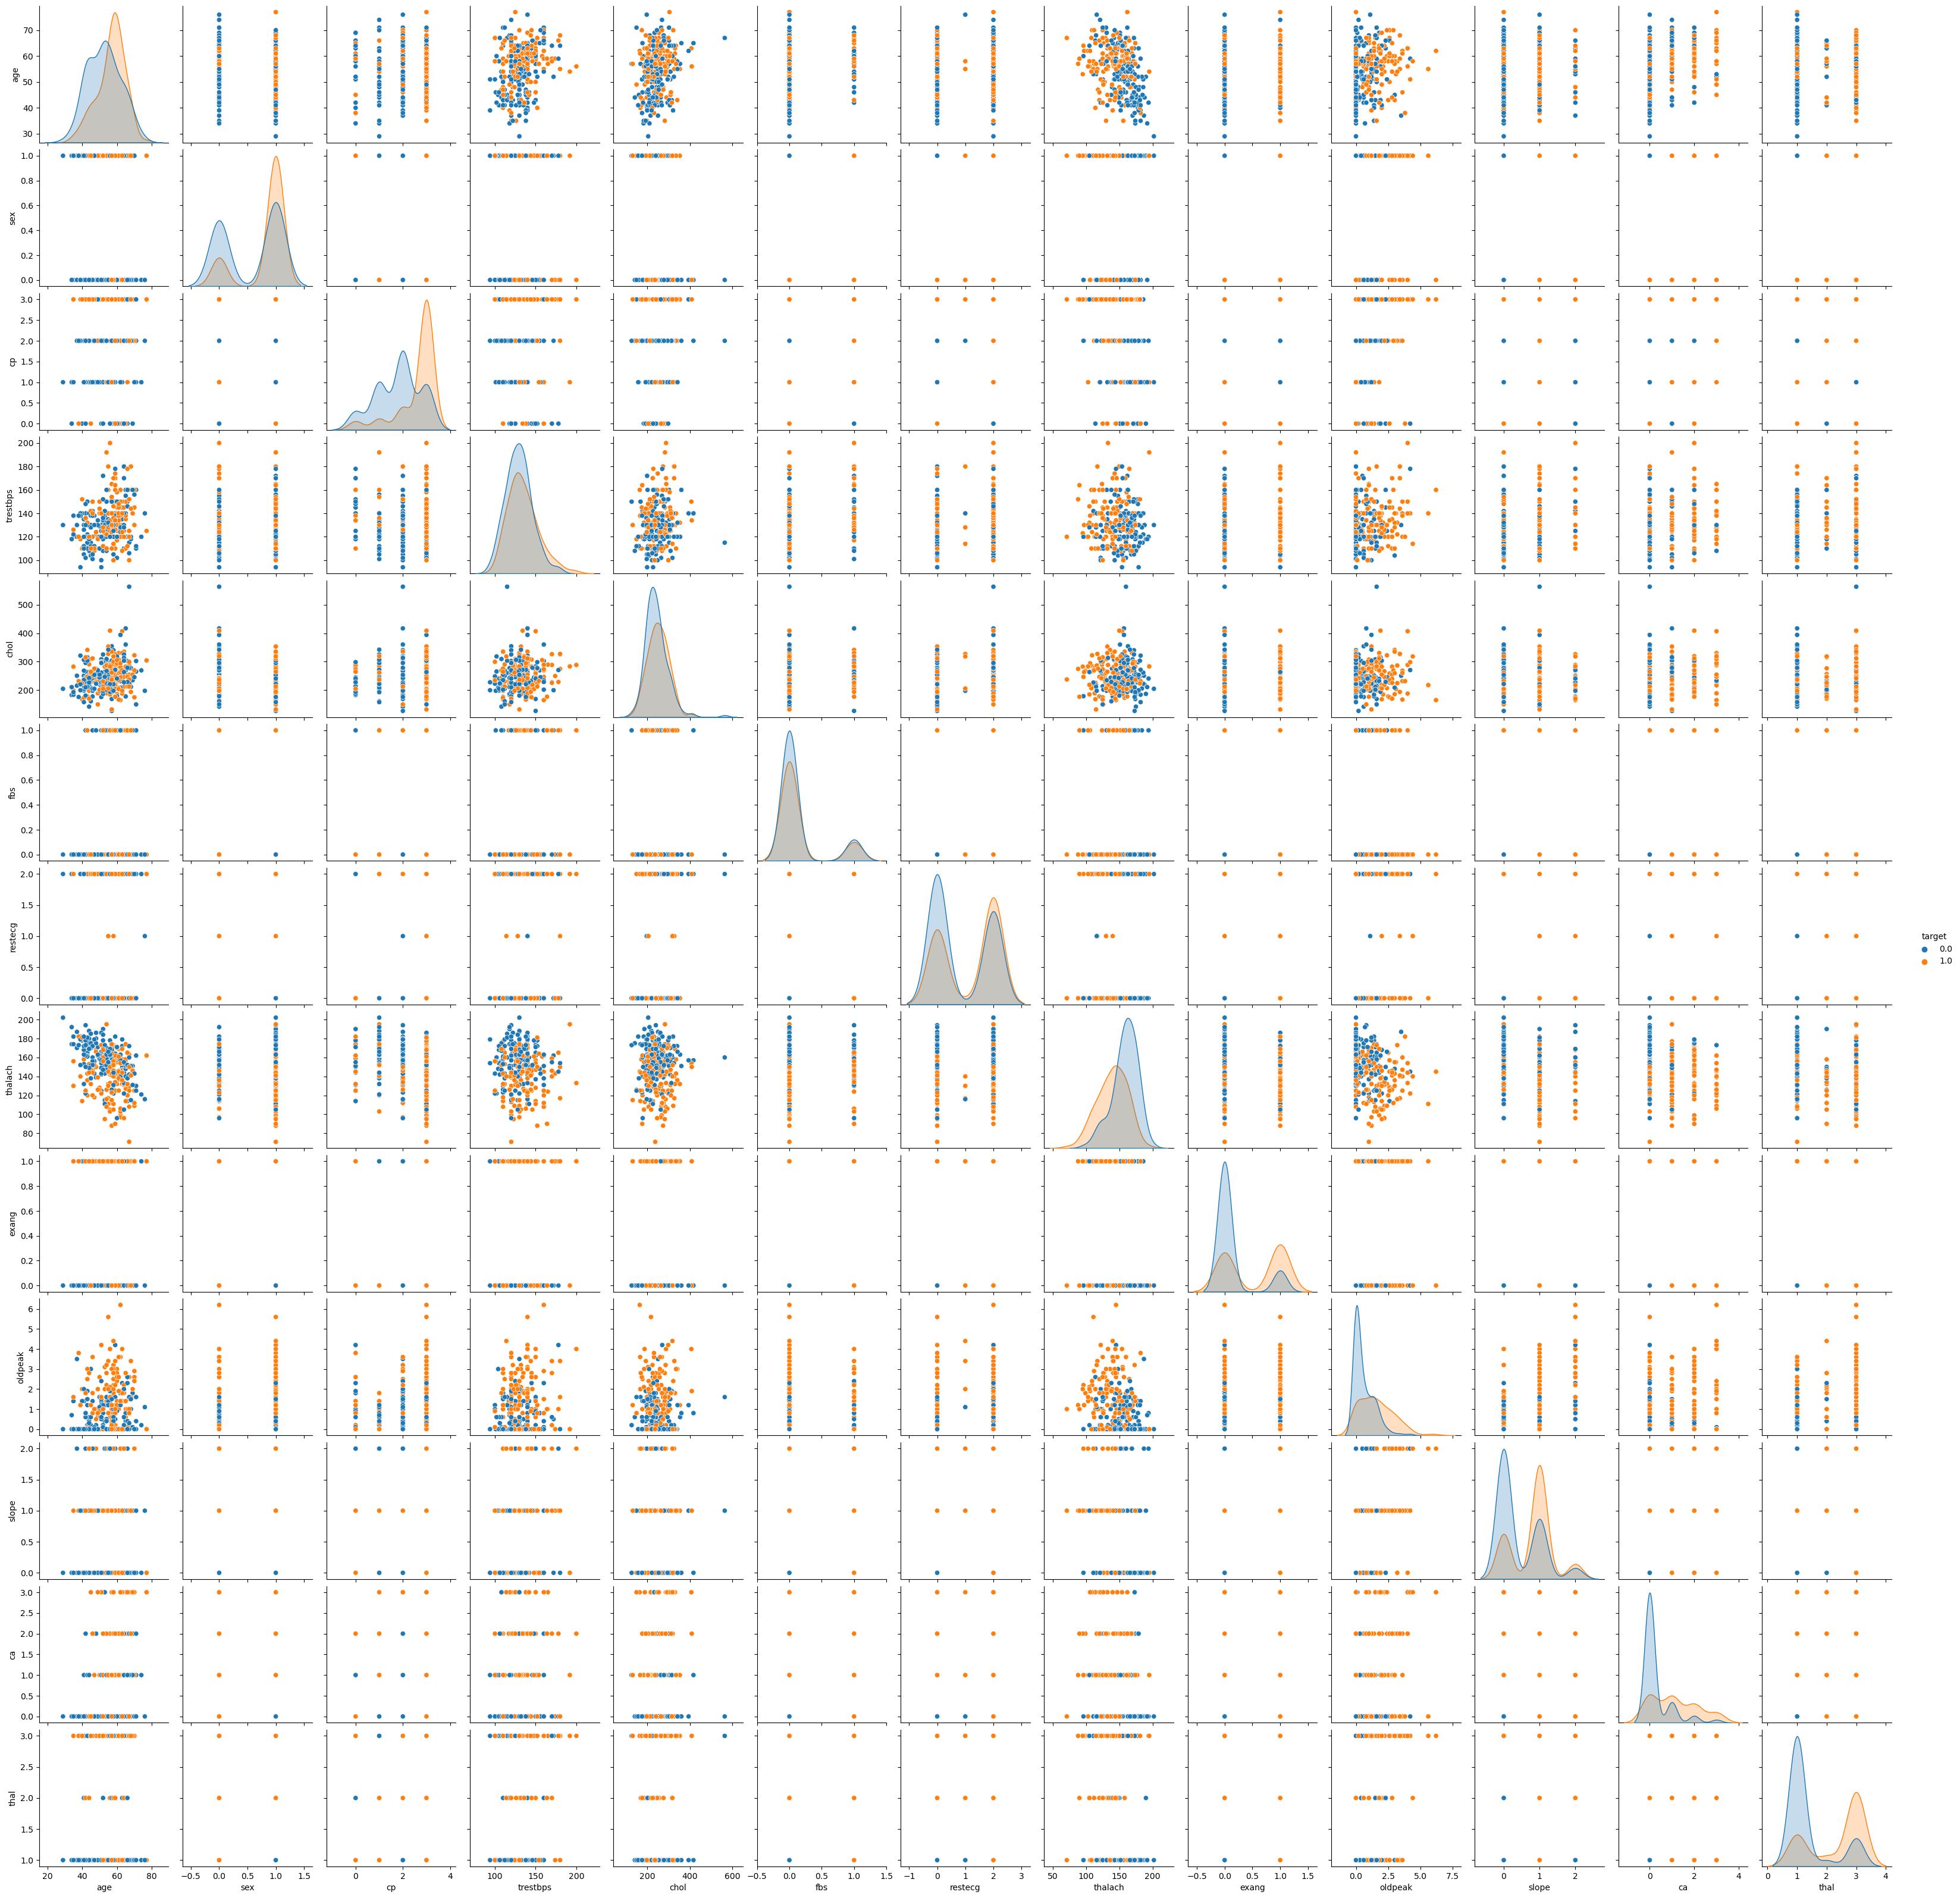

In [8]:
sns.pairplot(data_imputed, hue='target')
plt.show()

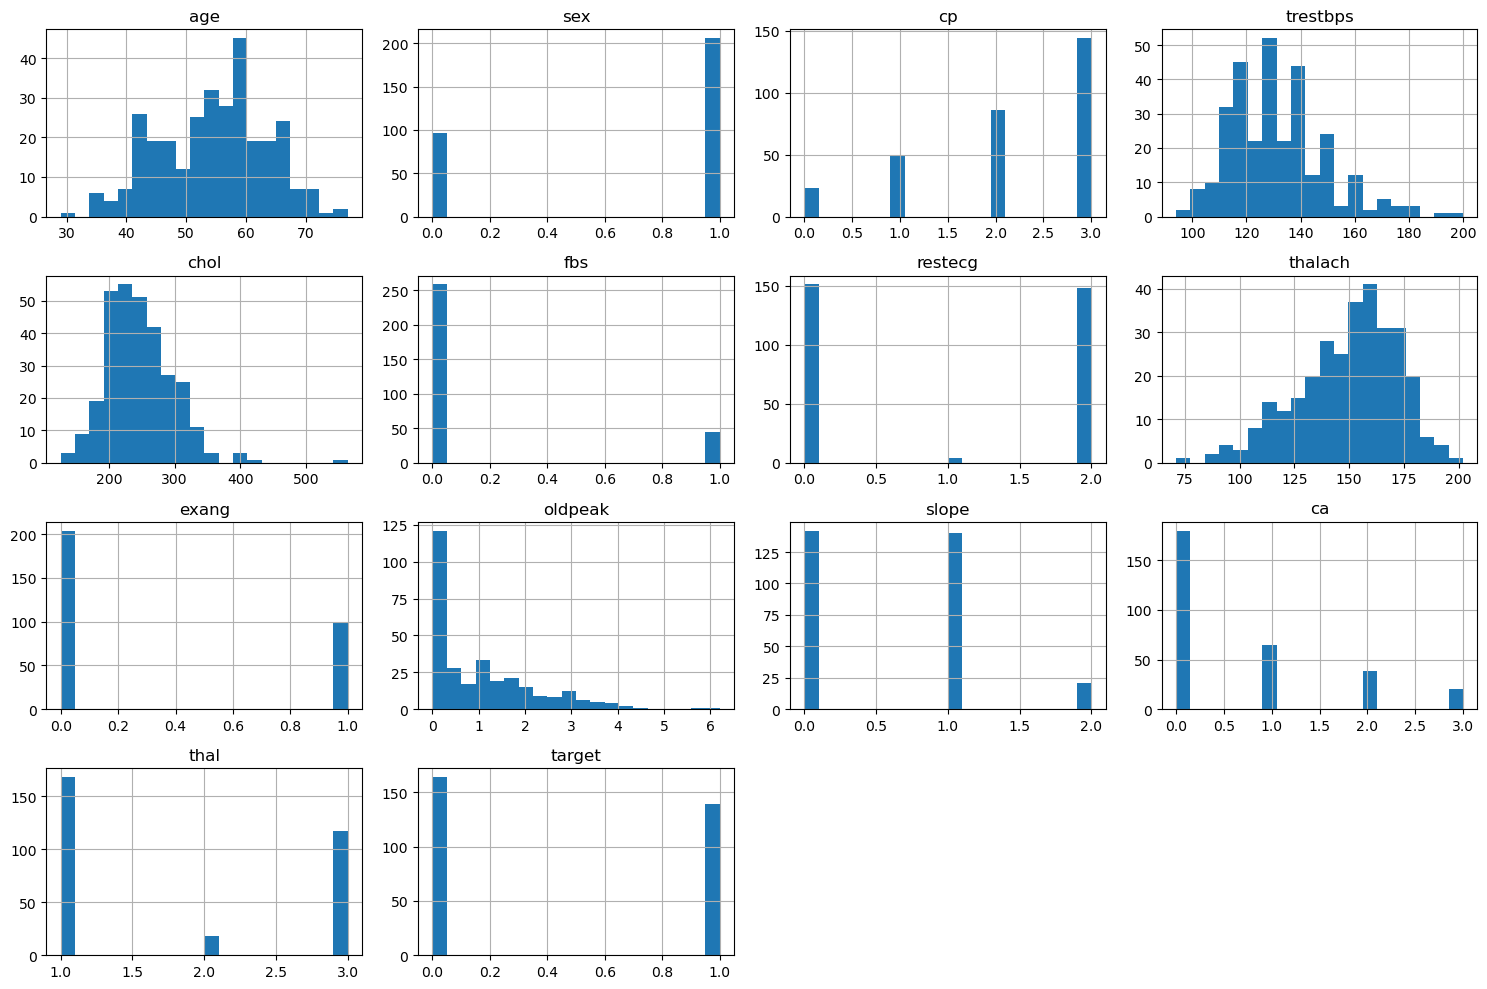

In [9]:
data_imputed.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

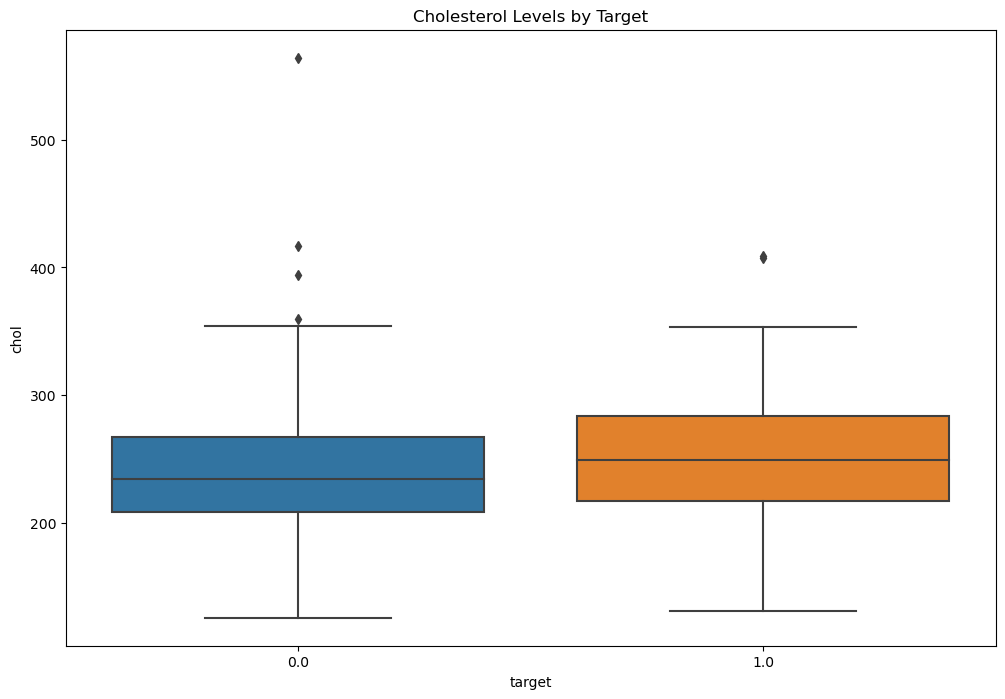

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='chol', data=data_imputed)
plt.title('Cholesterol Levels by Target')
plt.show()


# Split the Dataset

In [11]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression and Random Forest Models

In [12]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Models

## Logistic Regression

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        33
         1.0       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



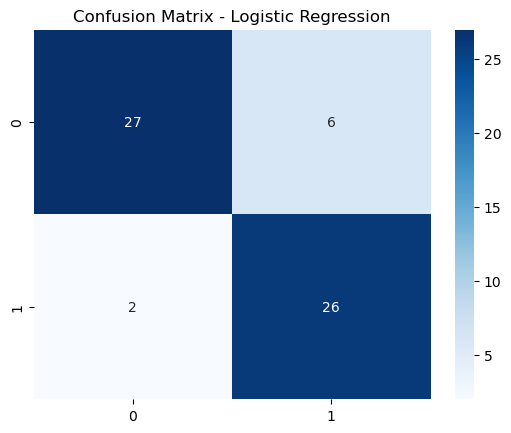

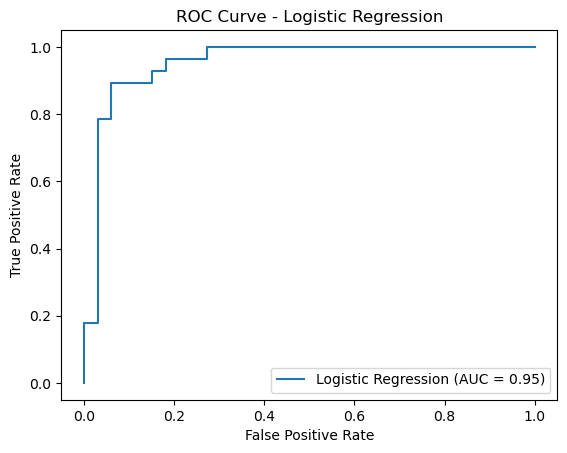

In [13]:
# Predictions
y_pred_log = logistic_model.predict(X_test)

# Classification Report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve
y_pred_prob_log = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_log)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

## Random Forest

Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90        33
         1.0       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



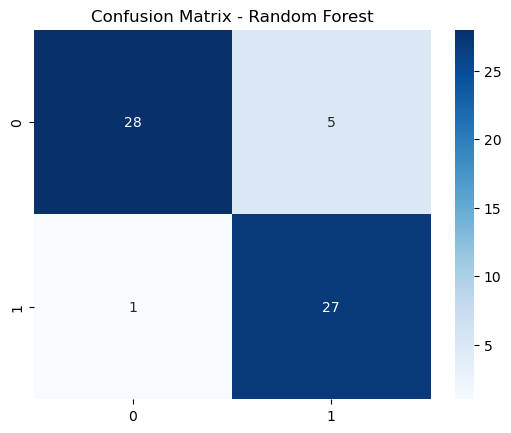

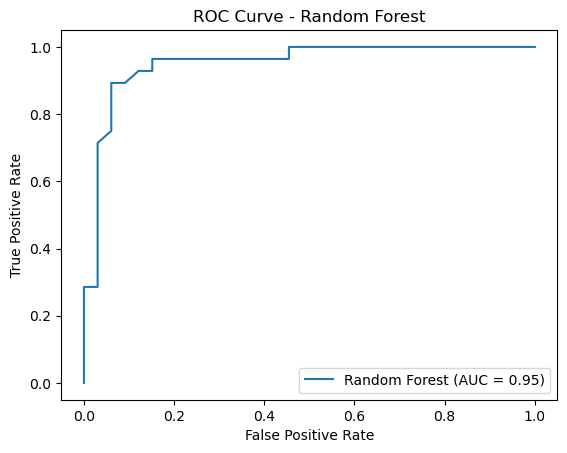

In [14]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# Model Comparision

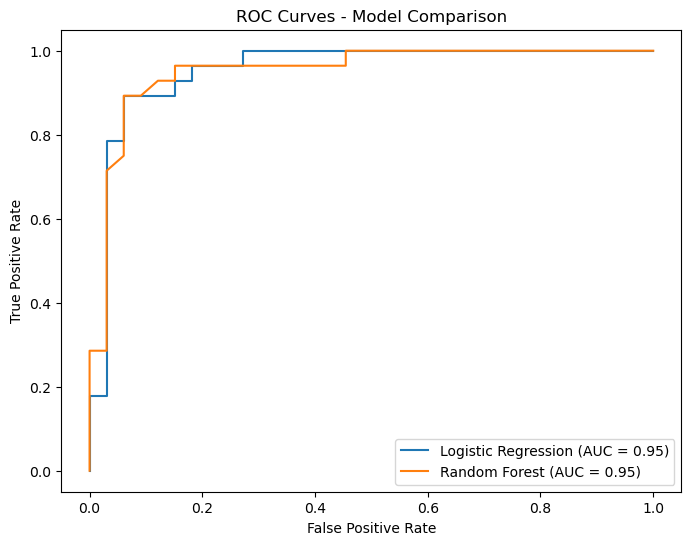

In [15]:
# Logistic Regression Evaluation
y_pred_log = logistic_model.predict(X_test)
y_pred_prob_log = logistic_model.predict_proba(X_test)[:, 1]

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_log, tpr_log)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.show()
